In [2]:
''' import '''
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [3]:
''' load data '''
data = io.loadmat('./data/hw2_prob2.mat')

A = data['A']
d = data['d']
d_up = data['d_up']

M, N = A.shape

In [4]:
''' hyper param '''
ALPHA = 0.01
BETA = 0.8
MAXITERS = 2000

In [5]:
''' without constraint '''

# gradient desent method
f_hist_wo = []

x = np.zeros((N, 1))

for i in range(MAXITERS):

    # f, grad
    f = 1/2*la.norm(A@x - d)**2
    grad = A.T@(A@x - d)

    # search direction (delta_x)
    delta_x = -grad

    # step size (t)
    t = 1
    # line search
    while (1/2*la.norm(A@(x + t*delta_x) - d)**2 > f + ALPHA*t*grad.T@delta_x):
        t = BETA*t

    # update x (x_k+1 = x_k + t*delta_x)
    x = x + t*delta_x
    
    # history
    f_hist_wo.append(f)

    print(f'i = {i}, f = {f}')

# optimal
x_wo = x

i = 0, f = 5412600.0
i = 1, f = 1600424.9623213205
i = 2, f = 638248.3353030799
i = 3, f = 352950.6504152568
i = 4, f = 243655.2659800006
i = 5, f = 188374.50694571788
i = 6, f = 154050.51144931564
i = 7, f = 130026.50462984527
i = 8, f = 112040.11954708716
i = 9, f = 98012.69927394371
i = 10, f = 86771.6981455325
i = 11, f = 77586.96752416399
i = 12, f = 69971.15268299809
i = 13, f = 63581.81541937466
i = 14, f = 58168.807878054846
i = 15, f = 53543.9399371227
i = 16, f = 49562.44471018294
i = 17, f = 46111.05178504712
i = 18, f = 43099.95570953159
i = 19, f = 40457.19578044749
i = 20, f = 38124.5987332125
i = 21, f = 36054.77704736979
i = 22, f = 34208.865654610265
i = 23, f = 32554.79008002
i = 24, f = 31065.92575139012
i = 25, f = 29720.050314224838
i = 26, f = 28498.518441285825
i = 27, f = 27385.607434086036
i = 28, f = 26367.99509002568
i = 29, f = 25434.34076199348
i = 30, f = 24574.947448293708
i = 31, f = 23781.487878632033
i = 32, f = 23046.781411471442
i = 33, f = 22364.611

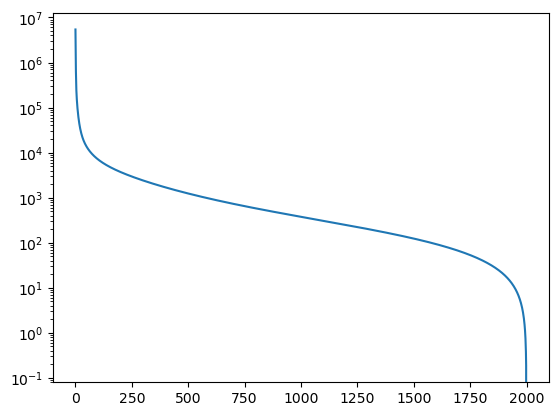

In [6]:
# plot
plt.semilogy(f_hist_wo - f_hist_wo[-1])
plt.show()

In [7]:
''' with constraint '''

# gradient desent method + log-barrier
f_hist_w = []

x = np.zeros((N, 1))
t_lb = 1 # for log-barrier

for i in range(MAXITERS):

    # f, grad
    f = t_lb/2*la.norm(A@x - d)**2 - np.sum(np.log(d_up - A@x))
    grad = t_lb*A.T@(A@x - d) + A.T@(1/(d_up - A@x))

    # search direction (delta_x)
    delta_x = -grad

    # step size (t)
    t = 1
    # feasibility check
    while (np.any(A@(x + t*delta_x) >= d_up)):
        t = BETA*t
    # line search
    while (t_lb/2*la.norm(A@(x + t*delta_x) - d)**2 - np.sum(np.log(d_up - A@(x + t*delta_x))) > f + ALPHA*t*grad.T@delta_x):
        t = BETA*t

    # update x (x_k+1 = x_k + t*delta_x)
    x = x + t*delta_x
    
    # history
    f_hist_w.append(f)

    print(f'i = {i}, f = {f}')

# optimal
x_w = x

i = 0, f = 5400189.706904169
i = 1, f = 1590606.9882313937
i = 2, f = 630628.8764116092
i = 3, f = 618115.5102821881
i = 4, f = 616069.1075622773
i = 5, f = 615982.1724118637
i = 6, f = 536021.2005372382
i = 7, f = 526134.6146784385
i = 8, f = 525100.5937805203
i = 9, f = 524992.4443735677
i = 10, f = 524791.7589227555
i = 11, f = 524781.6228497608
i = 12, f = 523957.7915487435
i = 13, f = 523823.37212992215
i = 14, f = 413472.07512988447
i = 15, f = 409939.10513746436
i = 16, f = 409567.58459460153
i = 17, f = 409522.3984882965
i = 18, f = 407586.9672417728
i = 19, f = 374887.27780263475
i = 20, f = 372878.9376484846
i = 21, f = 372613.85419940023
i = 22, f = 372530.1966924854
i = 23, f = 329337.20334231935
i = 24, f = 327245.1240208814
i = 25, f = 327024.83954914566
i = 26, f = 326970.3604868962
i = 27, f = 323430.1385008837
i = 28, f = 323090.6767198738
i = 29, f = 323037.14034669986
i = 30, f = 309524.55778876576
i = 31, f = 308901.86443217035
i = 32, f = 308821.3981343506
i = 33, 

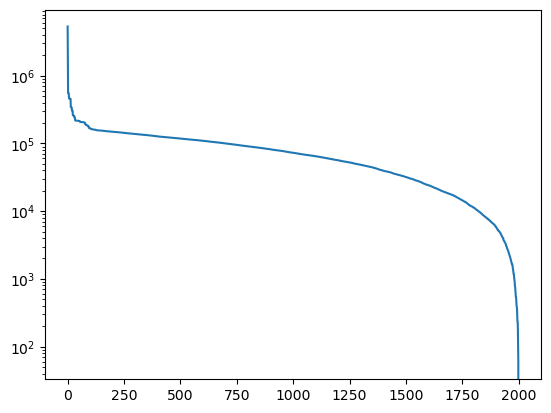

In [8]:
# plot
plt.semilogy(f_hist_w - f_hist_w[-1])
plt.show()

In [9]:
''' save '''
# np.savez('./opt/hw2_2.npz', A=A, x_wo=x_wo, x_w=x_w, f_hist_wo=f_hist_wo, f_hist_w=f_hist_w)

''' load '''
data = np.load('./opt/hw2_2.npz')

A = data['A']
x_wo = data['x_wo']
x_w = data['x_w']
f_hist_wo = data['f_hist_wo']
f_hist_w = data['f_hist_w']

In [10]:
''' DVH '''
def get_DVH_PTV(beam_kernel, beam_intensity):

    dose = beam_kernel@beam_intensity

    # differential DVH
    bins = np.linspace(0, 100, 1000)
    diff_DVH, _ = np.histogram(dose, bins=bins)

    # cumulative DVH
    cum_DVH = np.flip(np.cumsum(np.flip(diff_DVH)))
    cum_DVH = cum_DVH / np.max(cum_DVH) # normalize

    return cum_DVH

In [11]:
# calc
dvh_wo = get_DVH_PTV(A, x_wo)
dvh_w = get_DVH_PTV(A, x_w)

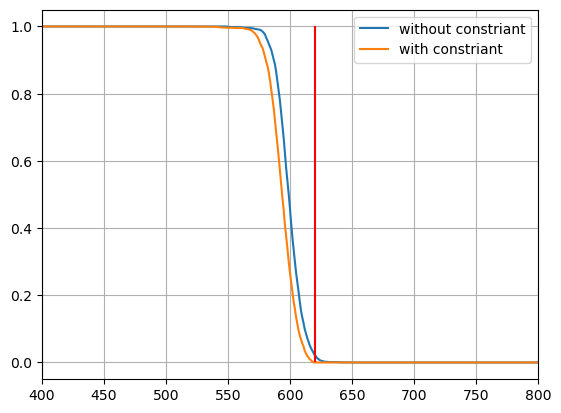

In [12]:
# plot
plt.plot(dvh_wo, label='without constriant')
plt.plot(dvh_w, label='with constriant')
plt.vlines(620, 0, 1, 'r')
plt.xlim([400, 800])
plt.legend()
plt.grid()
plt.show()